<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결정 트리

##로지스틱 회귀로 와인 분류

In [1]:
import pandas as pd

wine = pd.read_csv('http://bit.ly/wine_csv_data')
# 가져온 데이터 유형은 데이터프레임

In [2]:
wine.head() # 5번째 까지 출력

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


class=0이면 레드와인, 1이면 화이트와인

info()메서드

데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


만약 누락값이 있다면, 그 데이터를 버리거나 평균값을 넣을 수 있음

어떤 방식이 최선인지는 미리 알기 어려움

두가지 모두 시도할 것

참고: 항상 훈련 세트의 통계 값으로 테스트 세트를 변환하므로 훈련 세트의 평균값으로 테스트 세트의 누락된 값을 채워야함

즉, 누락값을 데이터의 평균으로 설정하고자 결정했다면, 테스트 세트의 누락값에는 항상 훈련 세트의 평균값을 넣어야함

테스트 세트는 훈련 세트의 통계(평균과 표준편차)로 변환(전처리)해야함

그렇지 않을 경우 데이터의 스케일이 달라지므로 훈련한 모델이 쓸모 없게 됨

쉽게 말해서 같은 기준으로 데이터를 가공하지 않으면 비교가 불가능하다는 뜻

discribe()는

간단한 데이터 통계 출력

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


갯수, 평균, 표준편차, 최솟값 1사분위수, 2사분위수(중간값), 3사분위수, 최대값

알콜 도수와 당도, ph값의 스케일이 다름을 알 수 있음

데이터와 타겟으로 분리하고 넘파이 배열로 변환후 표준화 진행

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy() # 데이터프레임을 넘파이 배열로 변환

from sklearn.model_selection import train_test_split # 훈련 세트, 테스트 세트 나누기

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #샘플 개수가 충분히 많으므로 20%정도만 테스트 세트로 나눔   # stratify=target 추가(클래스 비율에 맞게 나눔)

print(train_input.shape, test_input.shape)
print(list(train_target).count(0))
print(list(test_target).count(0))

(5197, 3) (1300, 3)
1258
341


Text(0, 0.5, 'frequency')

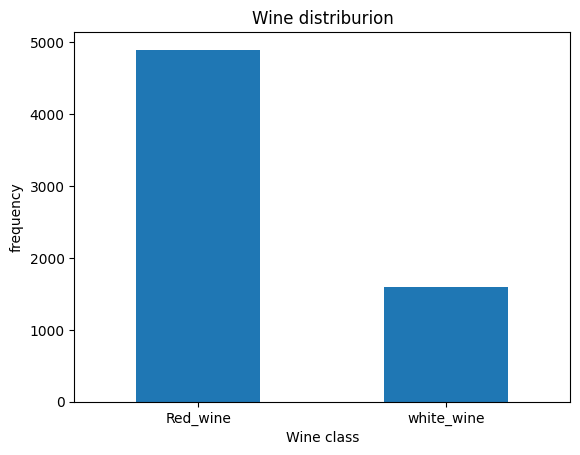

In [6]:
LABELS = [ "Red_wine", "white_wine" ]

import matplotlib.pyplot as plt
count_classes = pd.value_counts(wine['class'], sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Wine distriburion")
plt.xticks(range(2), LABELS)
plt.xlabel("Wine class")
plt.ylabel("frequency")

훈련 세트를 전치리

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) # test_input에서 훈련xxx!

로지스틱 회귀 모델을 훈련

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target)) # 과소적합, 과대적합 있는지 확인 위해
#이 모델은 과소적합(점수가 모두 낮음)

0.7808350971714451
0.7776923076923077


정확도가 낮음

##설명하기 쉬운 모델과 어려운 모델

In [9]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


로지스틱 회귀 모델이 왜 이러한 계수와 절편을 학습했는지 이해하기 힘듦

아마도 알콜 도수와 당도가 높을수록 화이트와인일 가능성이 높고, pH가 높을수록 레드와인일 가능성이 높을거라 추측할 수 있음

그러나 정확히 이 숫자가 어떤 의미인지 설명하기 어려움

다항 특성을 추가하면 더욱 어려워짐

대부분의 머신러닝 모델은 이렇게 학습 결과를 설명하기 어려움

##결정 트리

학습 결과를 설명하기 쉬운 알고리즘

사이킷런의 결정 트리 알고리즘은 노드에서 최적의 분할을 찾기 전에 특성의 순서를 섞음으로서 약간의 무작위성이 부여됨

sklearn.tree의 DecisionTreeClassifier 클래스 사용

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


과대적합(훈련 세트의 점수가 높고 테스트 세트의 점수가 낮음)

학습한 모델을 그림으로 표현

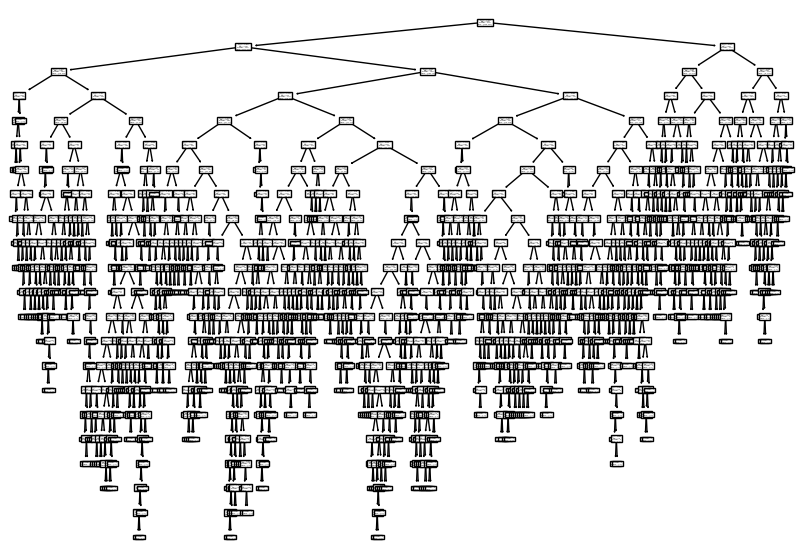

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

max_depth 루트 노드를 제외한 표현할 최대 깊이 지정(1이면 루트 노드를 제외하고 하나의 노드를 더 확장)

filled 클래스에 맞게 노드의 색을 칠함(False하면 빈 채색)

feature_names 특성의 이름을 전달

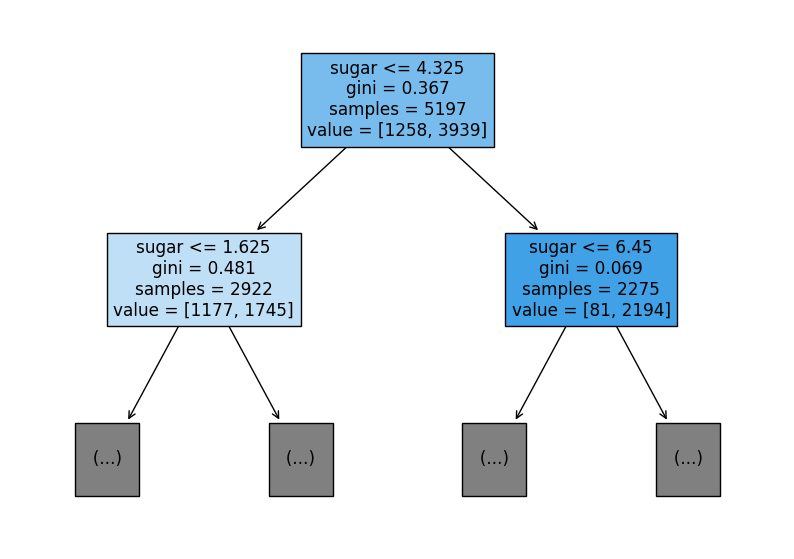

In [19]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()  # 표현할 최대 깊이 =1

테스트 조건(sugar)

불순도(gini)

총 샘플 수(samples)

클래스별 샘플 수(value)

조건을 만족하면 왼쪽, 아니면 오른쪽

samples 총 샘플 수(노드에 입력된 값)

value 음성과 양성 클래스 수

양성이 커질수록 파란색

파란색은 양성 클래스, 주황색은 음성 클래스

---
예측은 리프노드에서 가장 많은 클래스가 예측 클래스로 정해짐


왜 Sugar로 구분하는가?

각 노드는 데이터를 2개 이상의 부분집합으로 분할

-> 부분집합의 데이터가 균일해지도록 분할

여기서 균일은 분류와 회귀에 따라 의미가 달라짐


##분류나무 분할법칙
* 분할변수와 분할점은 클래스의 분포를 가장 잘 구별해주는 쪽으로 정함
  * 예를 들어, 위 그림에서 루트 노드의 분할변수는 sugar이고 분할점은 -0.239임

* 클래스의 분포를 잘 구별해지는 측도로 순수도(purity)도는 **불순도(impurity)**를 정의
  * 예를 들어, 클래스 0과 클래스 1의 비율이 40%와 60%인 노드는 각 클래스의 비율이 90%와 10%인 노드에 비해 순수도가 낮고 불순도가 높다라고 해석

* 각 노드에서 분할변수와 분할점의 설정은 불순도의 감소가 최대(**정보이득**이 최대)가 되도록 선택

##불순도(impurity)
**지니(gini)불순도**

DecisionTreeClassifier클래스의 criterion(기준) 매개변수의 기본값이 gini임

criterion 매개변수는 노드에서 데이터를 분할할 기준을 정하는데 사용됨

지니불순도 = 1 - (음성클래스 비율^2 + 양성클래스 비율^2)

루트를 기준으로 계산하면, gini = 1-((1258/5197)^2+(3939/5297)^2) = 0.367

지니 불순도는 0이 될 수록 좋고, 0.5(두 클래스의 비율이 정확히 1/2인 경우)가 될수록 안좋음

**엔트로피(entropy) 불순도**

citerion 매개변수를 entropy로 지정하여 지니 불순도 대신 사용가능

엔트로피 불순도 = -음성클래스 비율 * log_2(음성클래스 비율) - 양성클래스 비율 * log_2(양성클래스 비율)

루트를 기준으로 계산하면, entropy =-(1257/5197)*log_2(1257/5197)-(3939/5197)*log_2(3939/5197) = 0.798

엔트로피 불순도는 0이 도리 수록 좋고 1(두 클래스의 비율이 정확히 1/2인 경우)이 도리 수록 안좋음

##정보 이득(information gain)

부모 노드와 자식 노드의 불순도 차이

결정 트리 모델은 정보 이득을 가능한 크도록 트리를 생장시킴

정보 이득 = 부모의 불순도 - (왼쪽 노드 샘플 수/부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수/부모의 샘플 수) * 오른쪽 노드 불순도

루트의 정보 이득 = 0.367 - (2922/5197)*0.481 - (2275/5197)*0.069 = 0.066

###규제방법-가지치기1

**max_depth**

가장 간단한 방법으로써 트리의 최대 깊이를 지정하는 것

과대 및 과소 적합을 보정

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


훈련 세트의 성능은 낮아졌으나, 테스트 세트의 성능은 거의 동일

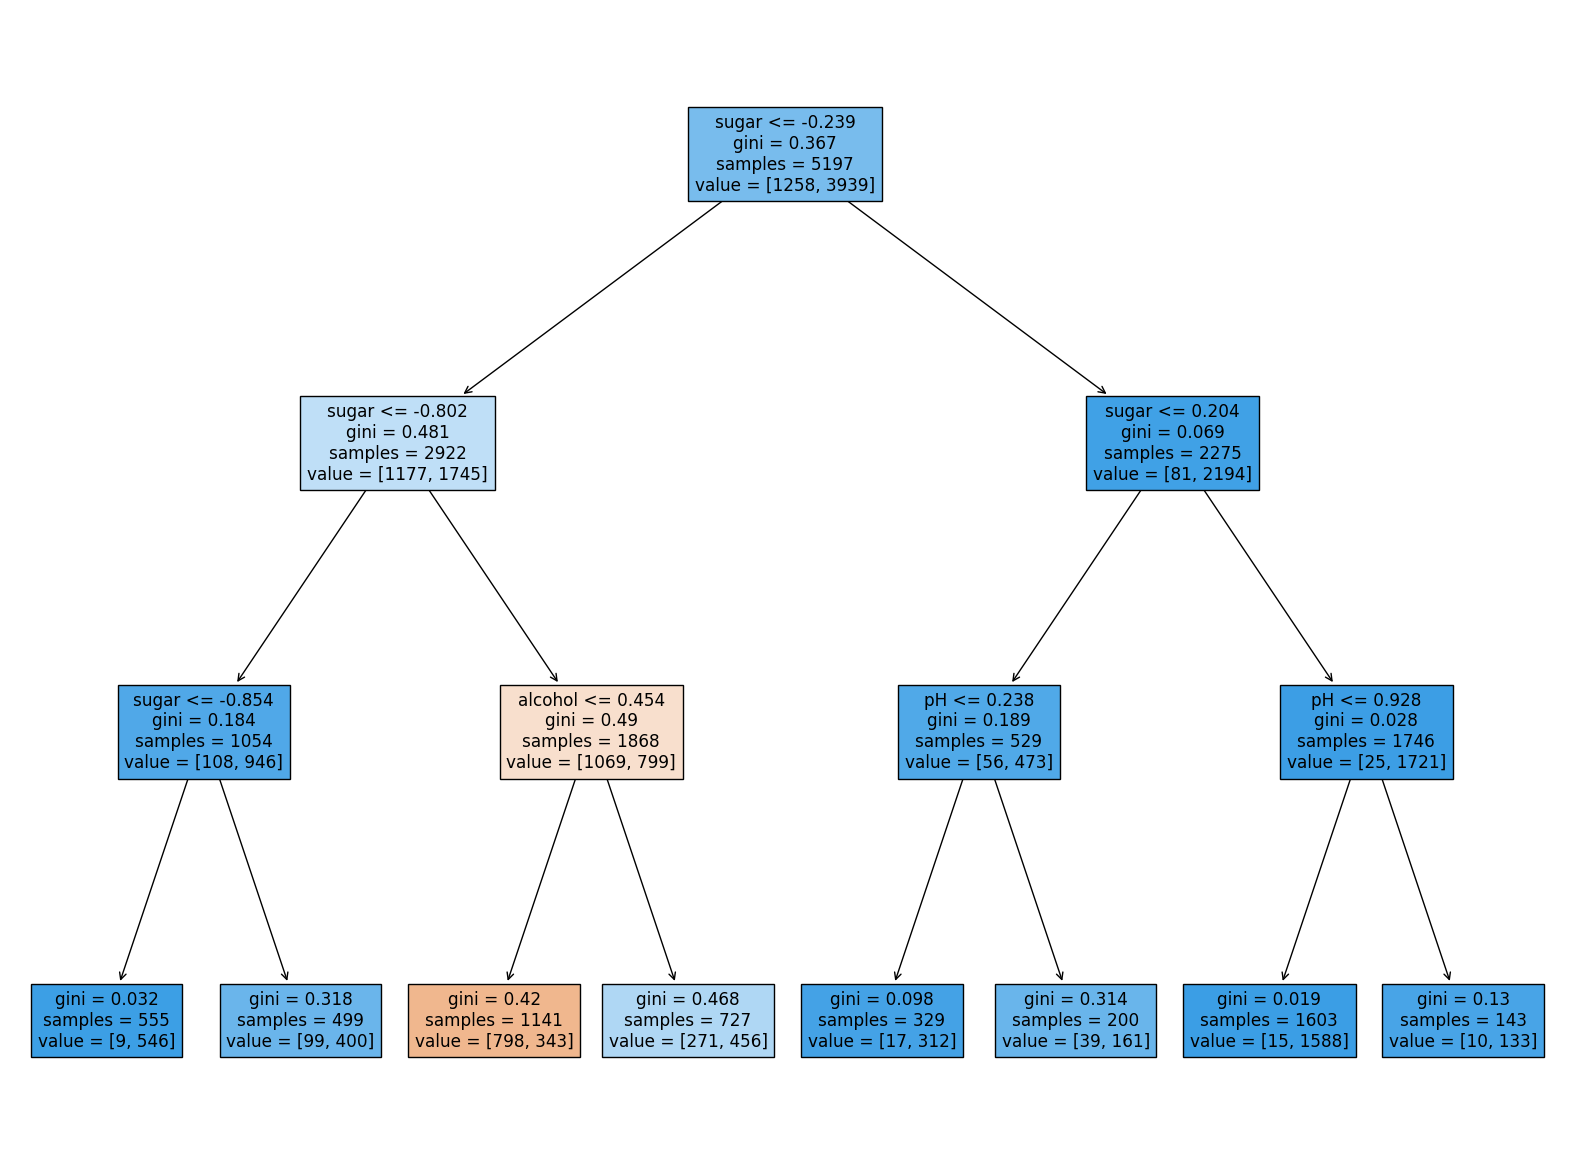

In [14]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

특성값의 스케일은 계산에 영향을 미치지 않으므로 표준화 전처리가 필요없음

특성 중 하나의 특성만 골라서 분류를 하기 때문! 하지만 그냥 정규화 해주시길...

결정트리의 장점 중 하나

In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


표준화 안한 점수가 동일

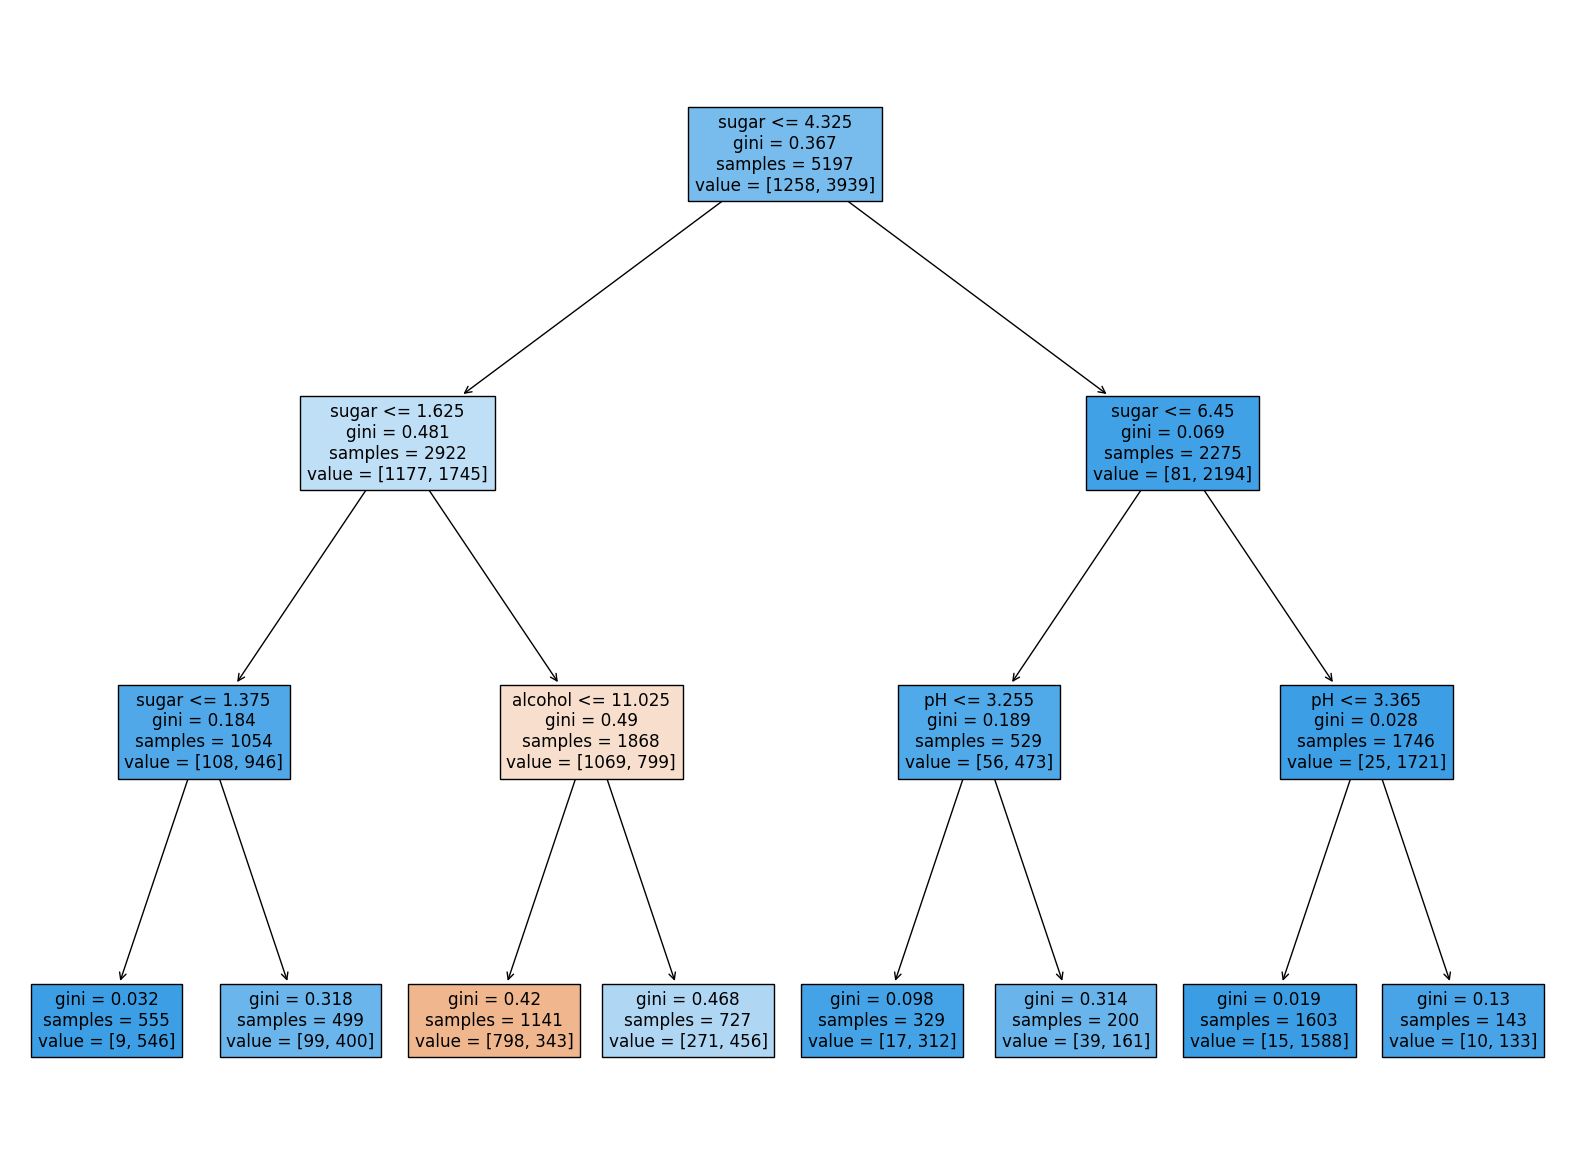

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

###특성 중요도

결정 트리에서 어떤 특성이 가장 유용한지 나타내는 지표

특성 중요도를 활용하면 결정 트리 모델을 특헝 선택에 활용할 수 있다는 장점

특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산

이트리의 루트 노드와 깊이 1에서 당도를 사용했기 때문에 아마도 당도가 가장 중요한 특성일 것

In [17]:
print(dt.feature_importances_)
#['alcohol', 'sugar', pH']

[0.12345626 0.86862934 0.0079144 ]


##세개의 특성 중에서 당도만 사용해서 훈련해보자

깊이 3으로 해서

In [23]:
data_e = wine[['sugar']].to_numpy()
target_e = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input_e, test_input_e, train_target_e, test_target_e = train_test_split(data_e, target_e, test_size=0.2, random_state=42)

print(train_input_e.shape, test_input_e.shape)

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_input_e, train_target_e)
print(dt.score(train_input_e, train_target_e))
print(dt.score(test_input_e, test_target_e))

print(dt.feature_importances_)

(5197, 1) (1300, 1)
0.8404848951318068
0.8269230769230769
[1.]


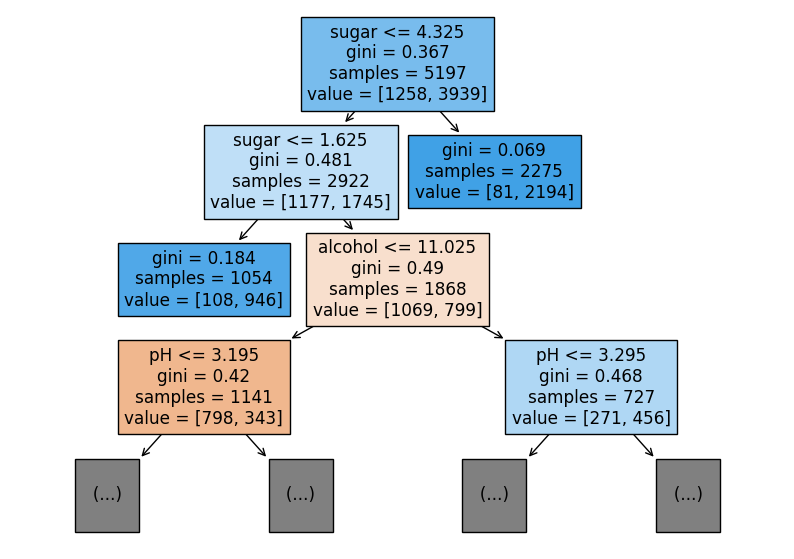

In [33]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##규제방법 -가지치기2

**min_inpurity_decrease**

가지치기의 일종

어떤 노드의 정보 이득*(노드의 샘플 수)/(전체 샘플 수)값이 이 매개변수보다 작으면 더 이상 분할하지 않게 만듦

과대적합을 방지하는 데 사용될 수 있음

In [29]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8568404848951318
0.8476923076923077


In [30]:
print(dt.feature_importances_)

[0.11575888 0.78484802 0.0993931 ]


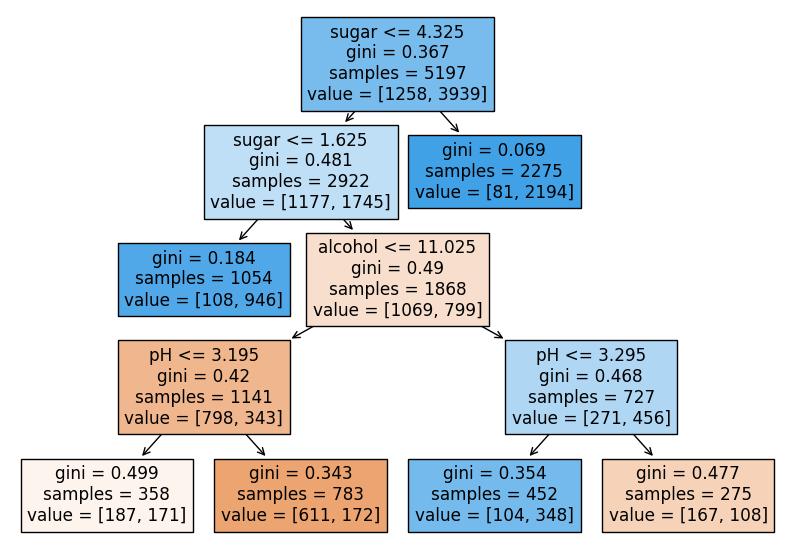

In [34]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##결정 트리
**장점**

학습 결과를 설명하기 쉬운 알고리즘

특성값의 스케일은 계산에 영향을 미치지 않으므로 **표준화 전처리가 필요없으**

어떤 특성이 가장 유용한지 나타내는 **특성 중요도**를 계산할 수 있음

특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다는 장점이 있음

---

**단점**

계층적 구조로 인해 중간에 에러가 발생하면 다음 단계로 에러가 계속 전파

학습 데이터에 미세한 변동에도 최종 결과에 크게 영향을 줌

적은 개수의 노이즈에도 크게 영향 받음

나무의 최종 노드 개수를 늘리면 과대적합 위험이 잇음

해결 방안으로 랜덤 포레스트(random forest)가 있음 <-5-3절